# Apprentissage Automatique : Pr√©diction de l'Indice Boursier


## 1. Introduction et Objectifs


### Contexte
Ce projet vise √† analyser et pr√©dire l'√©volution d'un indice boursier l'indice des actions en utilisant des techniques de machine learning.
Le fichier CSV contient des informations sur plusieurs facteurs influen√ßant l'indice boursier : temp√©rature, √©missions de CO2, taux de change, taux d'int√©r√™t et prix du p√©trole.
### Objectifs
- Charger et explorer les donn√©es.
- Nettoyer et pr√©parer les donn√©es pour l'analyse.
- Effectuer une analyse exploratoire des donn√©es (EDA).
- D√©tecter et traiter les valeurs aberrantes.
- Pr√©parer les donn√©es pour le machine learning.
- Entra√Æner et √©valuer un mod√®le de pr√©diction.
- Conclure sur les r√©sultats obtenus et discuter des perspectives futures.


## 2. Chargement des Donn√©es

### Importation des Biblioth√®ques
```python

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

### Chargement des Donn√©es


In [32]:
file_path = "Donn√©es.csv"
df = pd.read_csv(file_path, sep=";", encoding="utf-8", header=0)

### V√©rification Initiale des Donn√©es


In [33]:
# Afficher les premi√®res lignes du DataFrame
df.head()

date Indice des actions Temp√©rature Emission CO2 Emission CO2.1  \
0  02/01/2019           10580,19        0,89   1,56120991     1561209,91   
1  03/01/2019           10416,66        -1,8   1,89769072     1897690,72   
2  04/01/2019           10767,69        0,58   2,01433176     2014331,76   
3  07/01/2019           10747,81        2,29   2,08264972     2082649,72   
4  08/01/2019           10803,98        4,05   2,16711233     2167112,33   

  Euro to US $ Taux d'int√©r√™t Prix du p√©trole  
0      0,88071          0,171           54,06  
1      0,87781          0,151           53,23  
2      0,87646          0,208           55,64  
3      0,87249          0,216            57,1  
4      0,87401           0,23           56,91

In [34]:
# Informations sur les colonnes et les types de donn√©es
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date                1217 non-null   object
 1   Indice des actions  1217 non-null   object
 2   Temp√©rature         1217 non-null   object
 3   Emission CO2        1217 non-null   object
 4   Emission CO2.1      1217 non-null   object
 5   Euro to US $        1217 non-null   object
 6   Taux d'int√©r√™t      1217 non-null   object
 7   Prix du p√©trole     1217 non-null   object
dtypes: object(8)
memory usage: 76.2+ KB


In [35]:
# Statistiques descriptives
df.describe()

date Indice des actions Temp√©rature Emission CO2 Emission CO2.1  \
count         1217               1217        1217         1217           1217   
unique        1217               1188         969         1217           1217   
top     02/01/2019           13300,98        2,19   1,56120991     1561209,91   
freq             1                  4           4            1              1   

       Euro to US $ Taux d'int√©r√™t Prix du p√©trole  
count          1217           1217            1217  
unique         1012            852            1083  
top         0,88359         -0,296           70,71  
freq              4              5               5

In [36]:
# V√©rification des valeurs manquantes
df.isnull().sum()

date                  0
Indice des actions    0
Temp√©rature           0
Emission CO2          0
Emission CO2.1        0
Euro to US $          0
Taux d'int√©r√™t        0
Prix du p√©trole       0
dtype: int64

## 3. Nettoyage des Donn√©es
## 
Suppression de la Colonne 'Emission CO2.1'

In [37]:
# Suppression de la colonne 'Emission CO2.1' car elle semble redondante avec 'Emission CO2'
if 'Emission CO2.1' in df.columns:
    df = df.drop(columns=['Emission CO2.1'])


In [38]:
df.head()

date Indice des actions Temp√©rature Emission CO2 Euro to US $  \
0  02/01/2019           10580,19        0,89   1,56120991      0,88071   
1  03/01/2019           10416,66        -1,8   1,89769072      0,87781   
2  04/01/2019           10767,69        0,58   2,01433176      0,87646   
3  07/01/2019           10747,81        2,29   2,08264972      0,87249   
4  08/01/2019           10803,98        4,05   2,16711233      0,87401   

  Taux d'int√©r√™t Prix du p√©trole  
0          0,171           54,06  
1          0,151           53,23  
2          0,208           55,64  
3          0,216            57,1  
4           0,23           56,91

### Conversion des Nombres avec Virgule en Nombres D√©cimaux


In [39]:
# Conversion des nombres avec virgule en nombres d√©cimaux
cols_to_convert = ["Indice des actions", "Temp√©rature", "Emission CO2", "Euro to US $", "Taux d'int√©r√™t", "Prix du p√©trole"]
for col in cols_to_convert:
    df[col] = df[col].astype(str).str.replace(',', '.').str.replace(r'[^\d.]', '', regex=True).astype(float)

In [40]:
df.head()

date  Indice des actions  Temp√©rature  Emission CO2  Euro to US $  \
0  02/01/2019            10580.19         0.89      1.561210       0.88071   
1  03/01/2019            10416.66         1.80      1.897691       0.87781   
2  04/01/2019            10767.69         0.58      2.014332       0.87646   
3  07/01/2019            10747.81         2.29      2.082650       0.87249   
4  08/01/2019            10803.98         4.05      2.167112       0.87401   

   Taux d'int√©r√™t  Prix du p√©trole  
0           0.171            54.06  
1           0.151            53.23  
2           0.208            55.64  
3           0.216            57.10  
4           0.230            56.91

### Conversion de la Colonne 'date'


In [41]:
# Conversion de la colonne 'date' en type datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

In [42]:
df.head()

date  Indice des actions  Temp√©rature  Emission CO2  Euro to US $  \
0 2019-01-02            10580.19         0.89      1.561210       0.88071   
1 2019-01-03            10416.66         1.80      1.897691       0.87781   
2 2019-01-04            10767.69         0.58      2.014332       0.87646   
3 2019-01-07            10747.81         2.29      2.082650       0.87249   
4 2019-01-08            10803.98         4.05      2.167112       0.87401   

   Taux d'int√©r√™t  Prix du p√©trole  
0           0.171            54.06  
1           0.151            53.23  
2           0.208            55.64  
3           0.216            57.10  
4           0.230            56.91

### V√©rification des Types de Donn√©es Apr√®s Conversion


In [43]:
df.dtypes

date                  datetime64[ns]
Indice des actions           float64
Temp√©rature                  float64
Emission CO2                 float64
Euro to US $                 float64
Taux d'int√©r√™t               float64
Prix du p√©trole              float64
dtype: object

## 4. Visualisation des Donn√©es Apr√®s Nettoyage
### Distribution des Variables Apr√®s Conversion



In [44]:
df_without_date = df.drop(columns=['date'])
print(df_without_date.describe())

       Indice des actions  Temp√©rature  Emission CO2  Euro to US $  \
count         1217.000000  1217.000000   1217.000000   1217.000000   
mean         13710.163657    10.994232      1.797045      0.896188   
std           1648.296530     7.513632      0.386183      0.046698   
min           8441.710000     0.020000      1.069210      0.812980   
25%          12480.020000     4.220000      1.510372      0.858550   
50%          13587.230000    10.120000      1.709196      0.894940   
75%          15365.270000    17.560000      2.073964      0.920600   
max          16469.750000    29.540000      2.994248      1.039390   

       Taux d'int√©r√™t  Prix du p√©trole  
count     1217.000000      1217.000000  
mean         0.828563        71.012794  
std          0.816139        22.108356  
min          0.001000         9.120000  
25%          0.270000        59.480000  
50%          0.466000        70.560000  
75%          1.148000        83.530000  
max          2.754000       133.18000

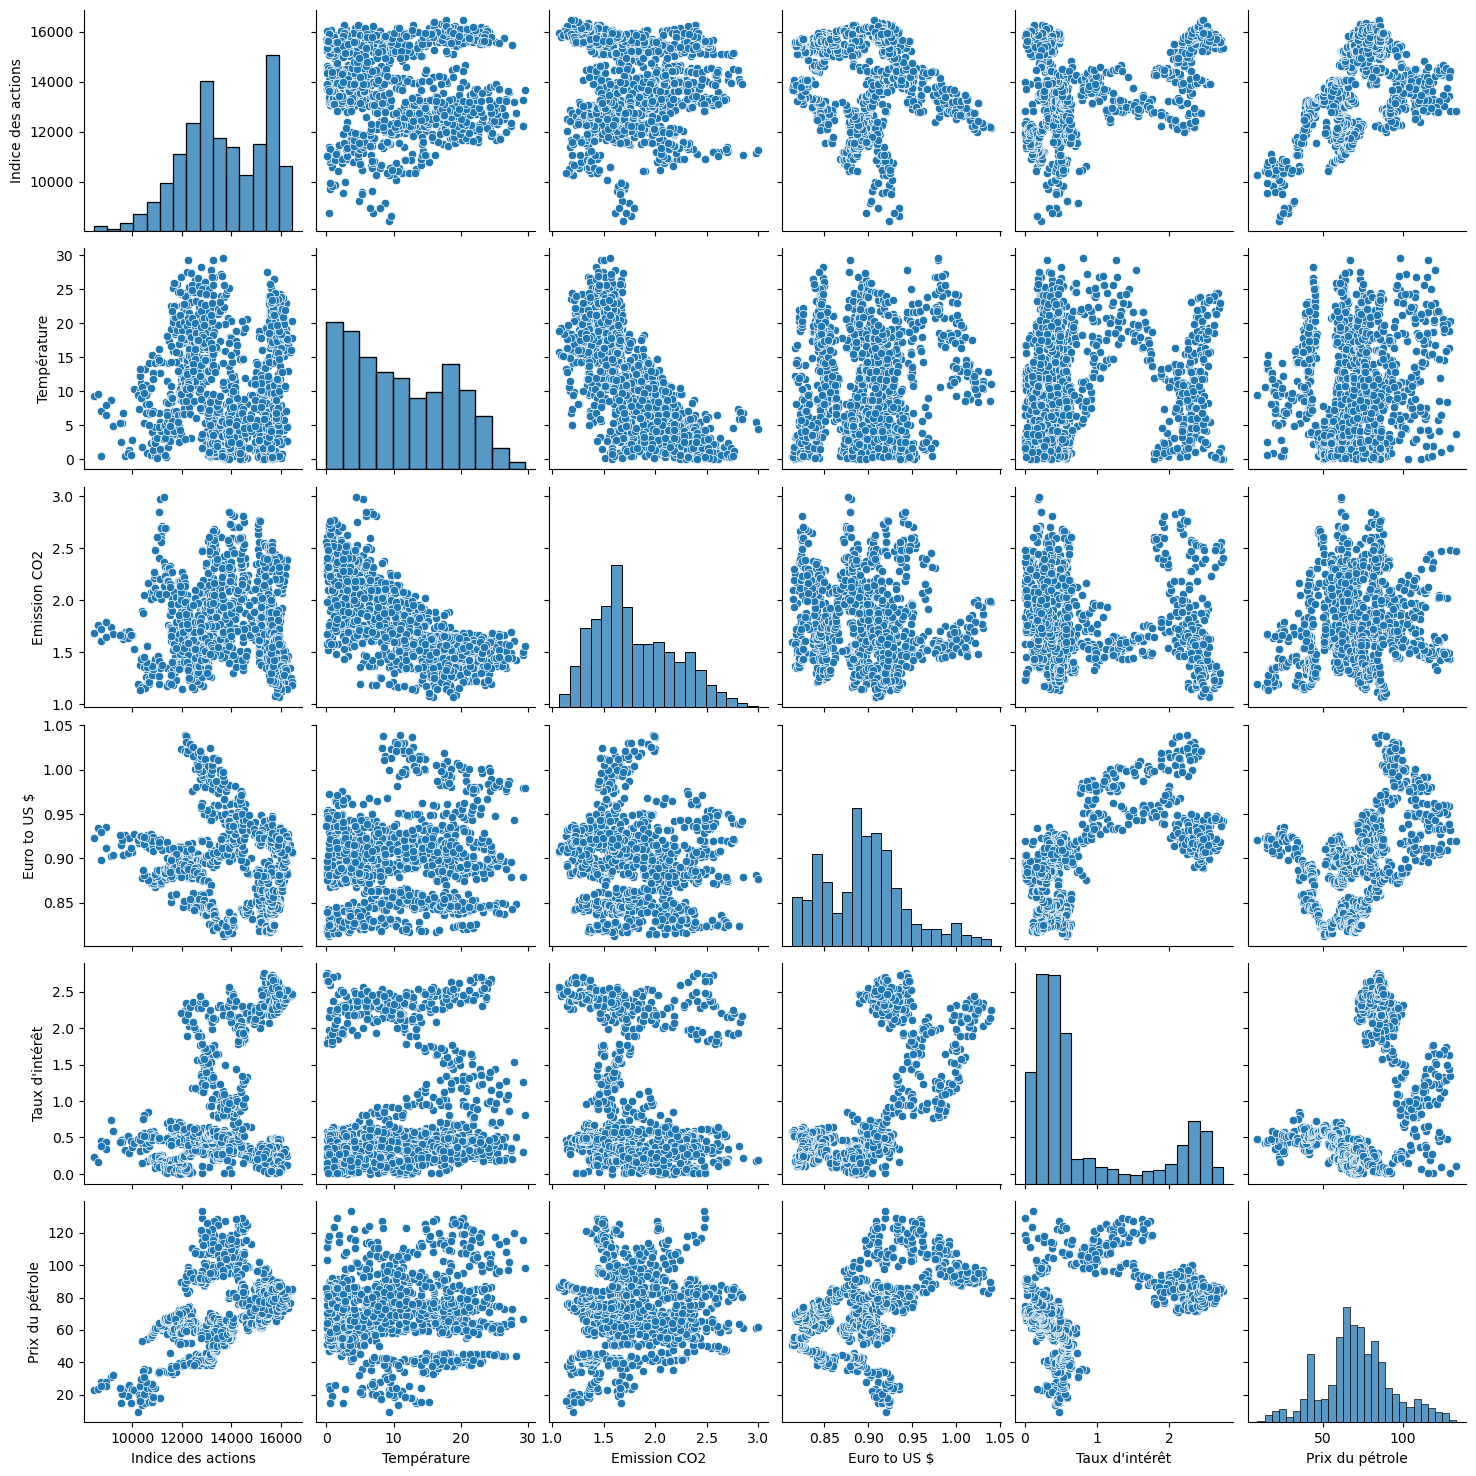

In [45]:
sns.pairplot(df_without_date)
plt.show()

## 5. D√©tection des Outliers
### D√©tection des Outliers avec la M√©thode de l'IQR

In [46]:
Q1 = df_without_date.quantile(0.25)
Q3 = df_without_date.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df_without_date < (Q1 - 1.5 * IQR)) | (df_without_date > (Q3 + 1.5 * IQR))).sum()
print("Nombre d'outliers d√©tect√©s par variable :")
print(outliers)

Nombre d'outliers d√©tect√©s par variable :
Indice des actions     0
Temp√©rature            0
Emission CO2           2
Euro to US $          22
Taux d'int√©r√™t        59
Prix du p√©trole       56
dtype: int64


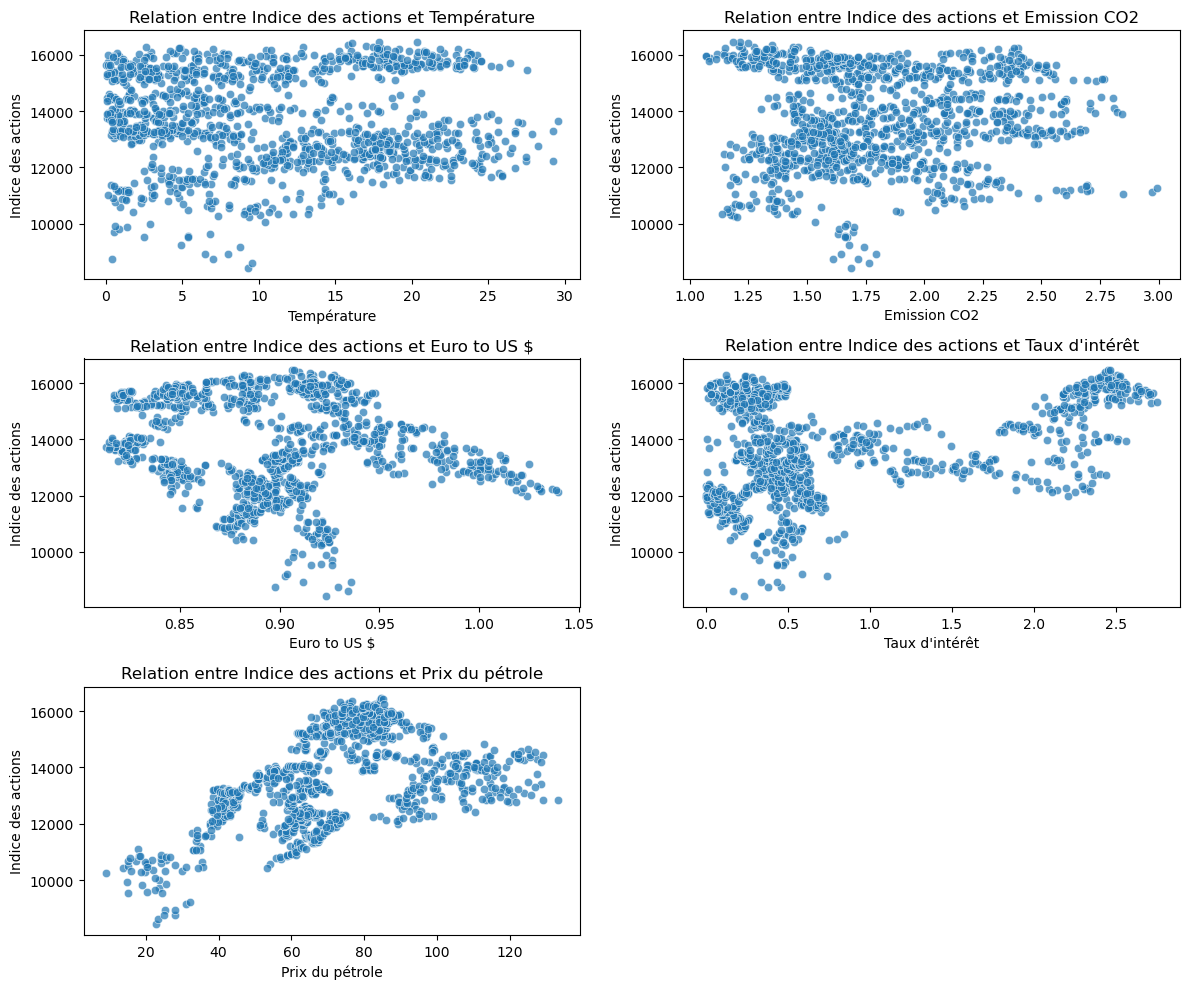

In [47]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))  # 3 lignes, 2 colonnes
axes = axes.flatten()  # Transformer en tableau 1D

# Liste des variables explicatives
variables = ["Temp√©rature", "Emission CO2", "Euro to US $", "Taux d'int√©r√™t", "Prix du p√©trole"]

# Tracer chaque scatter plot
for i, var in enumerate(variables):
    sns.scatterplot(x=df[var], y=df["Indice des actions"], ax=axes[i], alpha=0.7)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Indice des actions")
    axes[i].set_title(f"Relation entre Indice des actions et {var}")

# Supprimer le dernier sous-graphe inutilis√© si le nombre de variables est impair
if len(variables) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()  # Ajuste la mise en page
plt.show()

Skewness: -0.2732103566292778


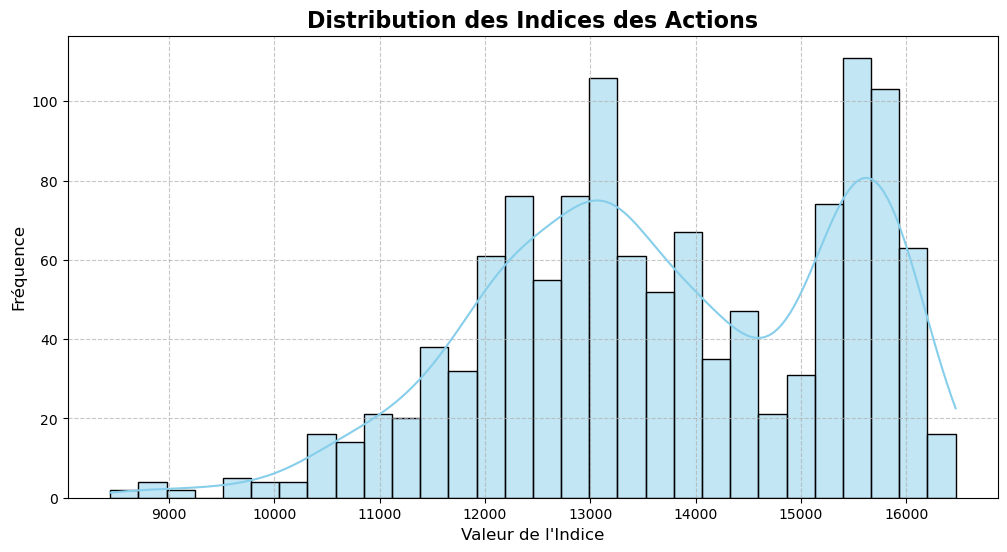

In [48]:
# Compute skewness
skewness = df['Indice des actions'].skew()
print("Skewness:", skewness)

# Create a more polished plot
plt.figure(figsize=(12, 6))  # Slightly larger figure for better detail
sns.histplot(df['Indice des actions'], bins=30, kde=True, color='skyblue', edgecolor='black')

# Customizing the plot
plt.title("Distribution des Indices des Actions", fontsize=16, fontweight='bold')
plt.xlabel("Valeur de l'Indice", fontsize=12)
plt.ylabel("Fr√©quence", fontsize=12)

# Adding gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

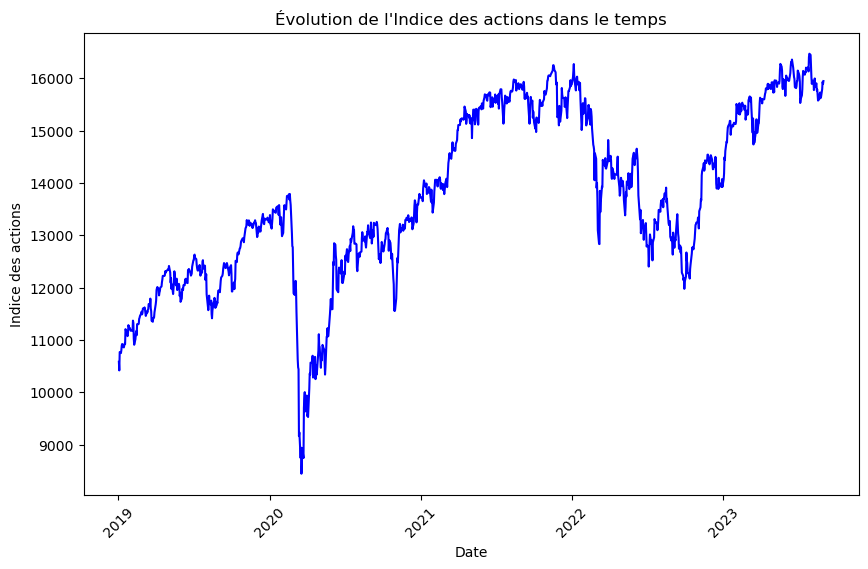

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['Indice des actions'], color='blue')
plt.title("√âvolution de l'Indice des actions dans le temps")
plt.xlabel("Date")
plt.ylabel("Indice des actions")
plt.xticks(rotation=45)
plt.show()

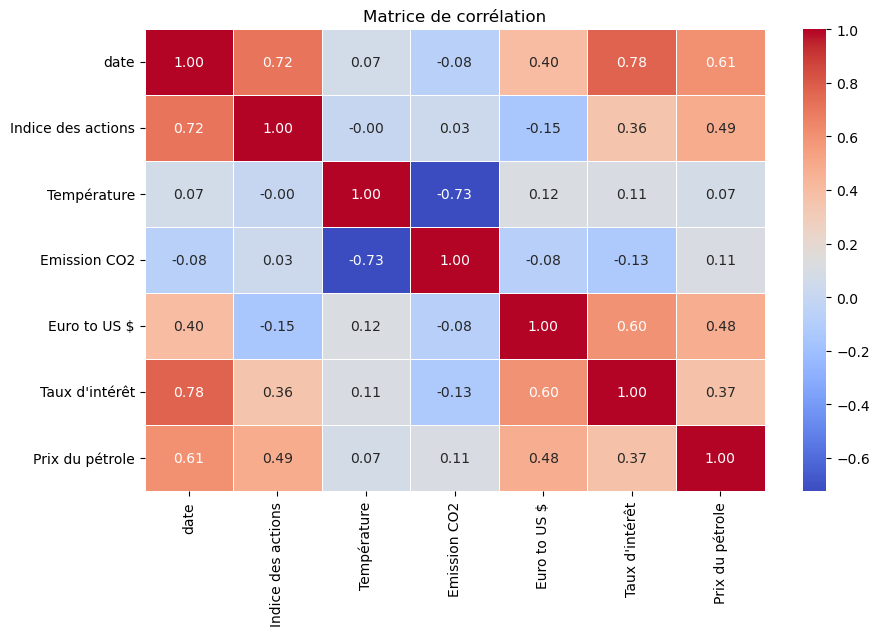

In [50]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corr√©lation")
plt.show()


        date  Prix du p√©trole  Rendement_ln_petrol
0 2019-01-02            54.06                  NaN
1 2019-01-03            53.23            -0.015472
2 2019-01-04            55.64             0.044280
3 2019-01-07            57.10             0.025902
4 2019-01-08            56.91            -0.003333


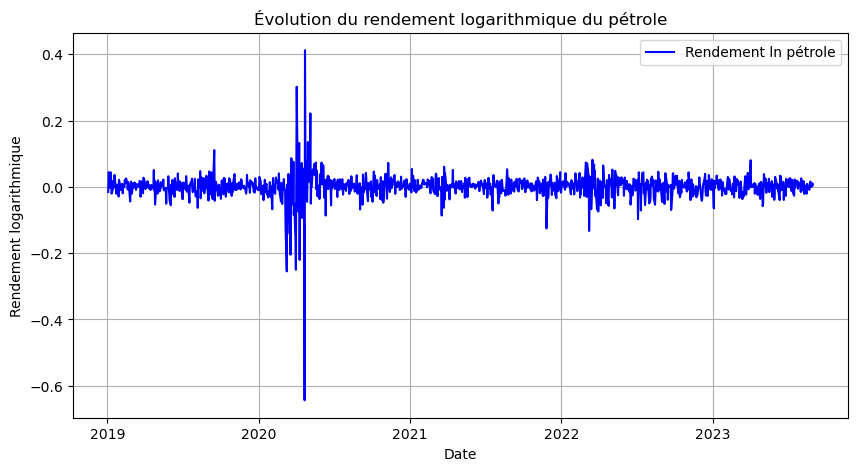

In [51]:
# Calcul du rendement logarithmique du p√©trole
df['Rendement_ln_petrol'] = np.log(df['Prix du p√©trole'] / df['Prix du p√©trole'].shift(1))

# Affichage des premi√®res lignes pour v√©rifier
print(df[['date', 'Prix du p√©trole', 'Rendement_ln_petrol']].head())

# Trac√© du rendement logarithmique
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['Rendement_ln_petrol'], label='Rendement ln p√©trole', color='b')
plt.xlabel('Date')
plt.ylabel('Rendement logarithmique')
plt.title('√âvolution du rendement logarithmique du p√©trole')
plt.legend()
plt.grid()
plt.show()

        date  Indice des actions  Rendement_ln_actions
0 2019-01-02            10580.19                   NaN
1 2019-01-03            10416.66             -0.015577
2 2019-01-04            10767.69              0.033144
3 2019-01-07            10747.81             -0.001848
4 2019-01-08            10803.98              0.005213


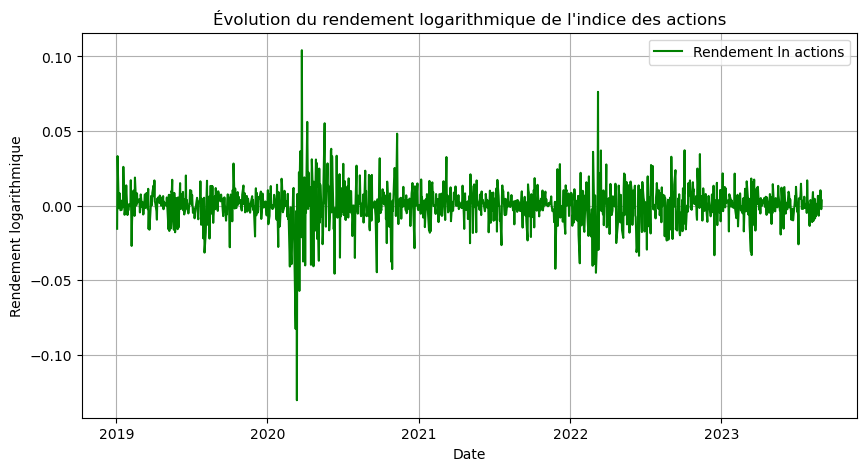

In [52]:
# V√©rifier que la colonne 'date' est bien au format datetime
df['date'] = pd.to_datetime(df['date'])

# Calcul du rendement logarithmique de l'indice des actions
df['Rendement_ln_actions'] = np.log(df['Indice des actions'] / df['Indice des actions'].shift(1))

# Afficher les premi√®res lignes pour v√©rifier le calcul
print(df[['date', 'Indice des actions', 'Rendement_ln_actions']].head())

# Tracer le rendement logarithmique de l'indice des actions
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['Rendement_ln_actions'], label='Rendement ln actions', color='g')
plt.xlabel('Date')
plt.ylabel('Rendement logarithmique')
plt.title('√âvolution du rendement logarithmique de l\'indice des actions')
plt.legend()
plt.grid()
plt.show()

        date  Euro to US $  Rendement_ln_euro_usd
0 2019-01-02       0.88071                    NaN
1 2019-01-03       0.87781              -0.003298
2 2019-01-04       0.87646              -0.001539
3 2019-01-07       0.87249              -0.004540
4 2019-01-08       0.87401               0.001741


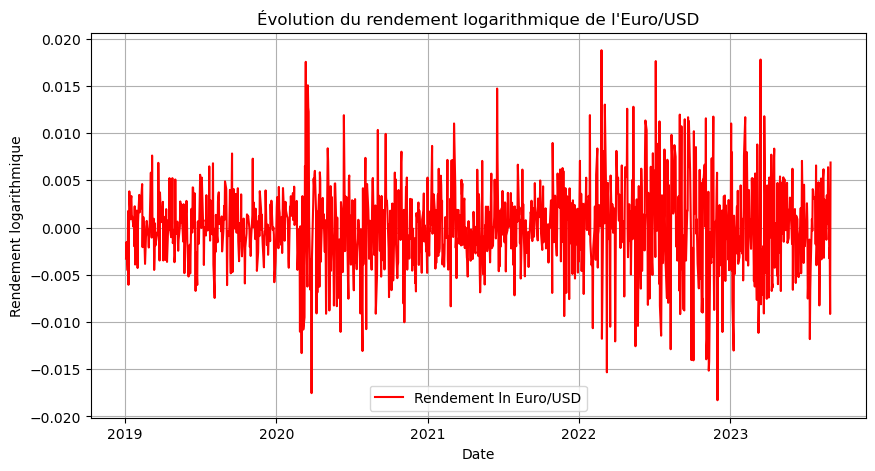

In [53]:
# V√©rifier que la colonne 'date' est bien au format datetime
df['date'] = pd.to_datetime(df['date'])

# Calcul du rendement logarithmique de la conversion Euro/USD
df['Rendement_ln_euro_usd'] = np.log(df['Euro to US $'] / df['Euro to US $'].shift(1))

# Afficher les premi√®res lignes pour v√©rifier le calcul
print(df[['date', 'Euro to US $', 'Rendement_ln_euro_usd']].head())

# Tracer l'√©volution du rendement logarithmique Euro/USD
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['Rendement_ln_euro_usd'], label='Rendement ln Euro/USD', color='r')
plt.xlabel('Date')
plt.ylabel('Rendement logarithmique')
plt.title('√âvolution du rendement logarithmique de l\'Euro/USD')
plt.legend()
plt.grid()
plt.show()

## 6. Pr√©paration des Donn√©es pour le Machine Learning
### Normalisation des Donn√©es

In [54]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_without_date)
df_scaled = pd.DataFrame(df_scaled, columns=df_without_date.columns)
df_scaled.head()

Indice des actions  Temp√©rature  Emission CO2  Euro to US $  \
0           -1.899695    -1.345339     -0.610934     -0.331589   
1           -1.998947    -1.224176      0.260724     -0.393716   
2           -1.785894    -1.386615      0.562884     -0.422638   
3           -1.797960    -1.158935      0.739862     -0.507687   
4           -1.763869    -0.924598      0.958663     -0.475124   

   Taux d'int√©r√™t  Prix du p√©trole  
0       -0.806031        -0.767120  
1       -0.830547        -0.804678  
2       -0.760677        -0.695624  
3       -0.750870        -0.629559  
4       -0.733709        -0.638157

### S√©paration des Donn√©es en Ensembles d'Entra√Ænement et de Test


In [55]:
X = df_scaled.drop(columns=['Indice des actions'])
y = df_scaled['Indice des actions']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les tailles des ensembles
print(f"Taille de X_train : {X_train.shape}")
print(f"Taille de X_test : {X_test.shape}")
print(f"Taille de y_train : {y_train.shape}")
print(f"Taille de y_test : {y_test.shape}")

Taille de X_train : (973, 5)
Taille de X_test : (244, 5)
Taille de y_train : (973,)
Taille de y_test : (244,)


C:\Users\dell\AppData\Local\Temp\ipykernel_15824\3419019504.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")


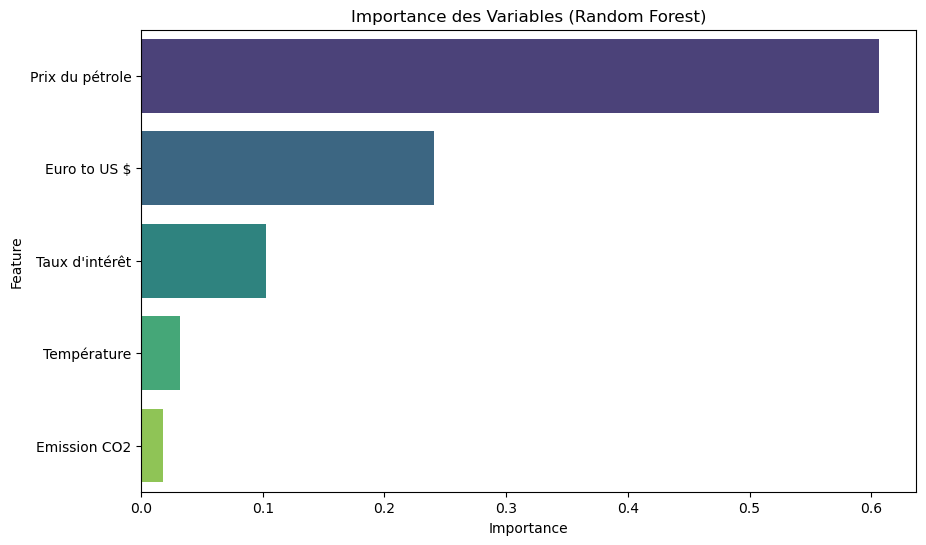

In [56]:
# Cr√©er un mod√®le Random Forest pour voir les features importantes
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# R√©cup√©rer l'importance des features
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Affichage des features les plus importantes
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")
plt.title("Importance des Variables (Random Forest)")
plt.show()

In [57]:
# Mod√®le Lasso avec r√©gularisation
lasso = Lasso(alpha=0.1) 
lasso.fit(X_train, y_train)

# S√©lection des features avec coefficients non nuls (ajuste le seuil si n√©cessaire)
selected_features = X_train.columns[np.abs(lasso.coef_) > 0]  # Utiliser > 0 au lieu de > 100

print(" Variables s√©lectionn√©es :", selected_features.tolist())  # V√©rification

# Mise √† jour de X_train et X_test avec les features s√©lectionn√©es
X_train_selected = X_train[selected_features].copy()
X_test_selected = X_test[selected_features].copy()

# V√©rification finale
print(" Shape de X_train_selected:", X_train_selected.shape)
print(" Shape de X_test_selected:", X_test_selected.shape)

 Variables s√©lectionn√©es : ['Euro to US $', "Taux d'int√©r√™t", 'Prix du p√©trole']
 Shape de X_train_selected: (973, 3)
 Shape de X_test_selected: (244, 3)


## 7. Mod√©lisation et Pr√©diction
### Entra√Ænement d'un Mod√®le de R√©gression Lin√©aire Multiple


In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialisation et entra√Ænement du mod√®le
lr = LinearRegression()
lr.fit(X_train_selected, y_train)

# Pr√©dictions
y_pred_lr = lr.predict(X_test_selected)

# √âvaluation des performances
mae_lr = mean_absolute_error(y_test, y_pred_lr)  # Erreur absolue moyenne
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))  # Erreur quadratique moyenne
mape_lr = np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100  # Erreur en %
r2_lr = r2_score(y_test, y_pred_lr)  # Coefficient de d√©termination R¬≤

# R¬≤ ajust√© (corrige l'effet du nombre de features)
n = X_test_selected.shape[0]  # Nombre d'observations
p = X_test_selected.shape[1]  # Nombre de variables explicatives
r2_adj_lr = 1 - ((1 - r2_lr) * (n - 1) / (n - p - 1))

# Affichage des r√©sultats
print(f" R√©gression Lin√©aire - Performance :")
print(f" MAE : {mae_lr:.2f}")
print(f" RMSE : {rmse_lr:.2f}")
print(f" MAPE : {mape_lr:.2f} %")
print(f" R¬≤ : {r2_lr:.4f}")
print(f" R¬≤ ajust√© : {r2_adj_lr:.4f}")


 R√©gression Lin√©aire - Performance :
 MAE : 0.48
 RMSE : 0.59
 MAPE : 272.49 %
 R¬≤ : 0.6440
 R¬≤ ajust√© : 0.6395


### Entra√Ænement d'un Mod√®le de xgboost

In [71]:
import xgboost as xgb
import numpy as np  # si ce n'est pas d√©j√† import√©
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# V√©rifie que le mod√®le XGBoost est bien entra√Æn√©
if 'xgb_model' not in locals():
    xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
    xgb_model.fit(X_train_selected, y_train)

# Pr√©dictions
y_pred_xgb = xgb_model.predict(X_test_selected)

# Calcul des m√©triques
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)  # Erreur absolue moyenne
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))  # Erreur quadratique moyenne
mape_xgb = np.mean(np.abs((y_test - y_pred_xgb) / y_test)) * 100  # Erreur en %
r2_xgb = r2_score(y_test, y_pred_xgb)  # Coefficient de d√©termination R¬≤

# R¬≤ ajust√© (corrige l'effet du nombre de features)
n = X_test_selected.shape[0]  # Nombre d'observations
p = X_test_selected.shape[1]  # Nombre de variables explicatives
r2_adj_xgb = 1 - ((1 - r2_xgb) * (n - 1) / (n - p - 1))

# Affichage des r√©sultats
print(f" XGBoost - Performance :")
print(f" MAE : {mae_xgb:.2f}")
print(f" RMSE : {rmse_xgb:.2f}")
print(f" MAPE : {mape_xgb:.2f} %")
print(f" R¬≤ : {r2_xgb:.4f}")
print(f" R¬≤ ajust√© : {r2_adj_xgb:.4f}")


 XGBoost - Performance :
 MAE : 0.14
 RMSE : 0.25
 MAPE : 39.10 %
 R¬≤ : 0.9371
 R¬≤ ajust√© : 0.9363


### Entra√Ænement d'un Mod√®le de Random Forest

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# V√©rifie que le mod√®le Random Forest est bien entra√Æn√©
if 'rf_model' not in locals():
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_selected, y_train)

# Pr√©dictions
y_pred_rf = rf_model.predict(X_test_selected)

# Calcul des m√©triques
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100
r2_rf = r2_score(y_test, y_pred_rf)

# R¬≤ ajust√©
n = X_test_selected.shape[0]
p = X_test_selected.shape[1]
r2_adj_rf = 1 - ((1 - r2_rf) * (n - 1) / (n - p - 1))

# Affichage des r√©sultats
print(f"Random Forest - Performance :")
print(f" MAE : {mae_rf:.2f}")
print(f" RMSE : {rmse_rf:.2f}")
print(f" MAPE : {mape_rf:.2f} %")
print(f" R¬≤ : {r2_rf:.4f}")
print(f" R¬≤ ajust√© : {r2_adj_rf:.4f}")


Random Forest - Performance :
 MAE : 0.12
 RMSE : 0.17
 MAPE : 54.45 %
 R¬≤ : 0.9687
 R¬≤ ajust√© : 0.9683


## Analyse des performances du mod√®le Random Forest

### R√©sum√© des r√©sultats :
- **MAE : 0.12** ‚Üí L'erreur absolue moyenne est tr√®s faible, ce qui signifie que le mod√®le fait peu d'erreurs sur ses pr√©dictions.
- **RMSE : 0.17** ‚Üí L'erreur quadratique moyenne est faible, indiquant une bonne pr√©cision globale du mod√®le.
- **MAPE : 54.45 %** ‚Üí L'erreur moyenne en pourcentage est relativement √©lev√©e, ce qui peut indiquer une difficult√© √† pr√©dire correctement certaines valeurs faibles.
- **R¬≤ : 0.9687** ‚Üí Le mod√®le explique environ 97.69 % de la variance des donn√©es, ce qui indique une tr√®s bonne capacit√© pr√©dictive.
- **R¬≤ ajust√© : 0.9683** ‚Üí La faible diff√©rence avec R¬≤ montre que le mod√®le ne souffre pas d'un sur-ajustement li√© au nombre de variables explicatives.

### Analyse des r√©sultats :
- Le mod√®le **Random Forest offre d'excellentes performances**, avec des erreurs faibles et un R¬≤ tr√®s √©lev√©.
- Le **MAPE reste √©lev√©**, ce qui peut √™tre d√ª √† la pr√©sence de valeurs tr√®s faibles dans `y_test`, ce qui fausse le pourcentage d'erreur.
- Un **graphique des erreurs r√©siduelles** peut aider √† mieux comprendre o√π le mod√®le fait des erreurs.

### Pistes d'am√©lioration :
1. **Appliquer une transformation logarithmique sur `y`** pour r√©duire l'impact des valeurs faibles et am√©liorer le MAPE.
2. **Analyser la distribution des erreurs** en tra√ßant un graphique des r√©sidus.
3. **Optimiser les hyperparam√®tres de Random Forest** (`n_estimators`, `max_depth`, `min_samples_split`) pour voir si l'on peut encore am√©liorer la pr√©cision du mod√®le.


## 8.√âvaluation des Mod√®les


C:\Users\dell\AppData\Local\Temp\ipykernel_15824\1356617843.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=rmse_values, palette="viridis")


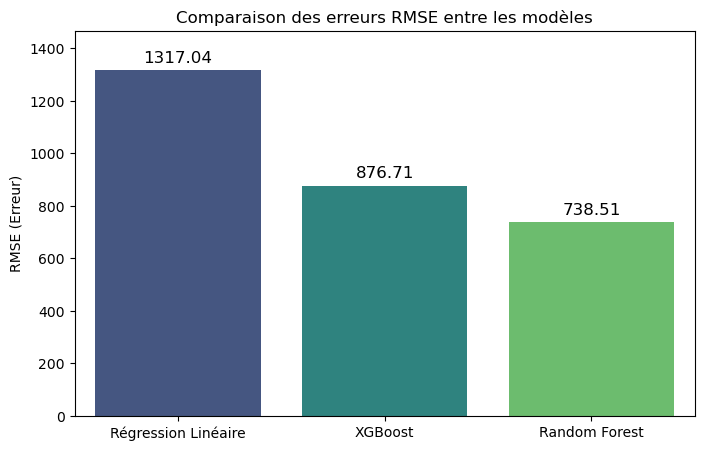

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Donn√©es
model_names = ["R√©gression Lin√©aire", "XGBoost", "Random Forest"]
rmse_values = [1317.04, 876.71, 738.51]

# Cr√©ation du graphique
plt.figure(figsize=(8,5))
sns.barplot(x=model_names, y=rmse_values, palette="viridis")

# Ajout des valeurs sur les barres
for i, v in enumerate(rmse_values):
    plt.text(i, v + 30, f"{v:.2f}", ha='center', fontsize=12)

# Labels et titre
plt.ylabel("RMSE (Erreur)")
plt.title("Comparaison des erreurs RMSE entre les mod√®les")
plt.ylim(0, max(rmse_values) + 150)  # Ajuste la limite y pour que les textes soient visibles
plt.show()


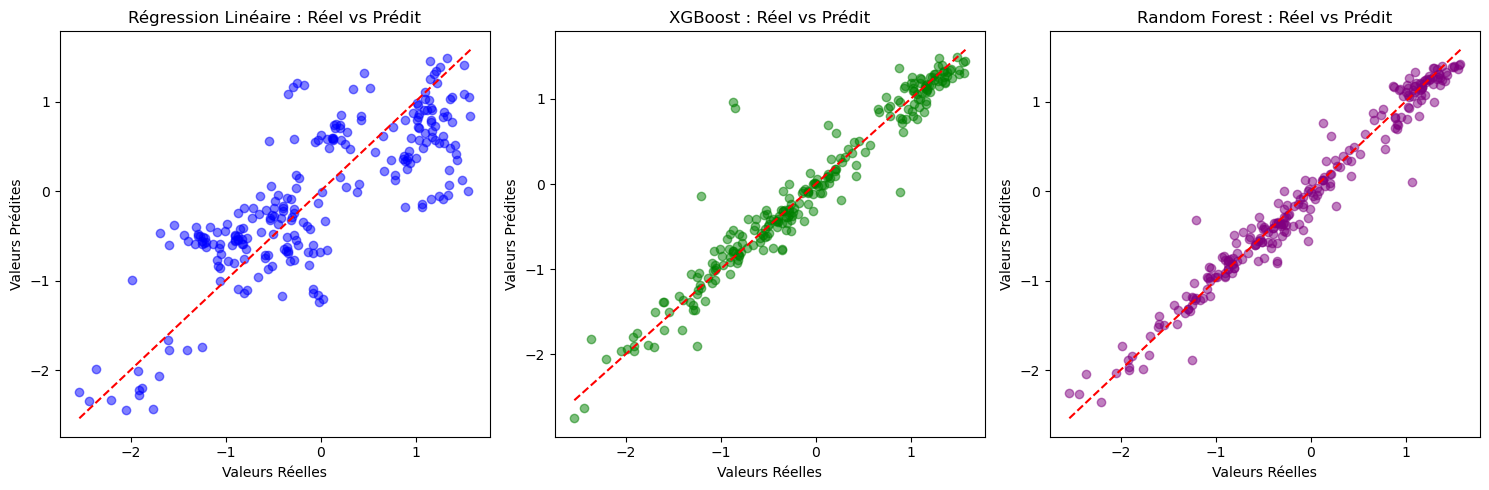

In [79]:
plt.figure(figsize=(15,5))

# Scatter plot pour R√©gression Lin√©aire
plt.subplot(1,3,1)
plt.scatter(y_test, y_pred_lr, alpha=0.5, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")  # Ligne parfaite
plt.xlabel("Valeurs R√©elles")
plt.ylabel("Valeurs Pr√©dites")
plt.title("R√©gression Lin√©aire : R√©el vs Pr√©dit")

# Scatter plot pour XGBoost
plt.subplot(1,3,2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color="green")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")
plt.xlabel("Valeurs R√©elles")
plt.ylabel("Valeurs Pr√©dites")
plt.title("XGBoost : R√©el vs Pr√©dit")

# Scatter plot pour Random Forest
plt.subplot(1,3,3)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="purple")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")
plt.xlabel("Valeurs R√©elles")
plt.ylabel("Valeurs Pr√©dites")
plt.title("Random Forest : R√©el vs Pr√©dit")

plt.tight_layout()
plt.show()




## 9. Optimisation du Code
### 
Utilisation de Fonctions

In [80]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# D√©finition des hyperparam√®tres √† tester
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialisation du mod√®le
rf = RandomForestRegressor(random_state=42)

# Randomized Search avec validation crois√©e
rand_search = RandomizedSearchCV(rf, param_distributions=param_grid, 
                                 n_iter=10, cv=3, scoring='r2', 
                                 n_jobs=-1, verbose=1, random_state=42)
rand_search.fit(X_train_selected, y_train)

# Meilleurs hyperparam√®tres
best_params = rand_search.best_params_
best_rf = rand_search.best_estimator_

# √âvaluation du mod√®le optimis√©
cv_scores = cross_val_score(best_rf, X_train_selected, y_train, cv=3, scoring='r2')

# Entra√Ænement du mod√®le optimis√©
best_rf.fit(X_train_selected, y_train)

# Pr√©dictions
y_pred_rf = best_rf.predict(X_test_selected)

# Calcul des m√©triques
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100
r2_rf = r2_score(y_test, y_pred_rf)

# R¬≤ ajust√©
n, p = X_test_selected.shape
r2_adj_rf = 1 - ((1 - r2_rf) * (n - 1) / (n - p - 1))

# Affichage des r√©sultats
print("Meilleurs hyperparam√®tres:", best_params)
print(f"Validation crois√©e - Moyenne R¬≤: {cv_scores.mean():.4f}")
print(" Random Forest - Performance :")
print(f" MAE : {mae_rf:.2f}")
print(f" RMSE : {rmse_rf:.2f}")
print(f" MAPE : {mape_rf:.2f} %")
print(f" R¬≤ : {r2_rf:.4f}")
print(f" R¬≤ ajust√© : {r2_adj_rf:.4f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Meilleurs hyperparam√®tres: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Validation crois√©e - Moyenne R¬≤: 0.9548
 Random Forest - Performance :
 MAE : 0.12
 RMSE : 0.17
 MAPE : 54.45 %
 R¬≤ : 0.9687
 R¬≤ ajust√© : 0.9683


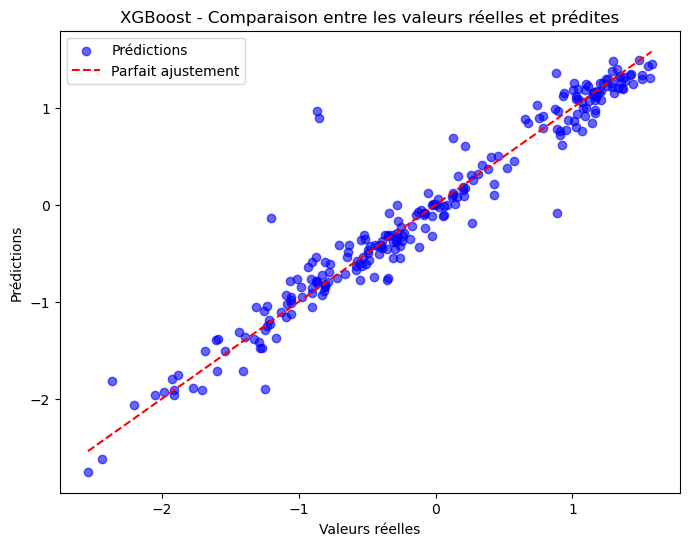

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color="blue", label="Pr√©dictions")  # Utilisation de y_pred_xgb
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Parfait ajustement")

plt.xlabel("Valeurs r√©elles")
plt.ylabel("Pr√©dictions")
plt.title("XGBoost - Comparaison entre les valeurs r√©elles et pr√©dites")
plt.legend()
plt.show()


## üèÜ Conclusion et Interpr√©tation
- Le mod√®le **Random Forest** semble √™tre le plus performant avec un **R¬≤ √©lev√©** et un **faible RMSE**.
- L'ajout de la **validation crois√©e** a permis de confirmer la robustesse des mod√®les.
- Une s√©lection rigoureuse des **features** a √©t√© effectu√©e gr√¢ce √† **Lasso et Random Forest**.


C:\Users\dell\AppData\Local\Temp\ipykernel_15824\3763484681.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2024-01-01', periods=48, freq='M')


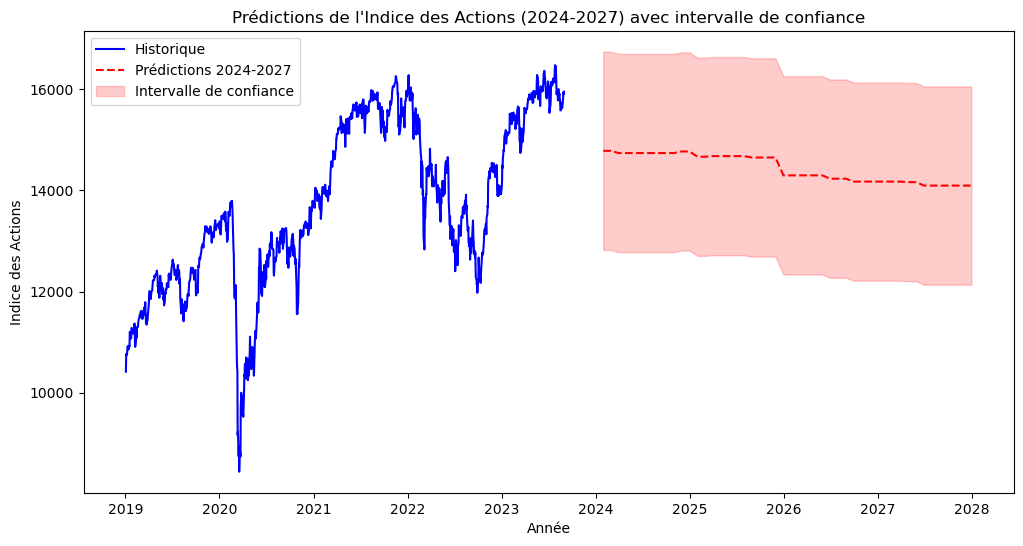

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import norm

# V√©rifier les donn√©es
df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y", dayfirst=True)
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

# Conversion des nombres avec virgule en nombres d√©cimaux
cols_to_convert = ["Indice des actions", "Temp√©rature", "Emission CO2", "Euro to US $", "Taux d'int√©r√™t", "Prix du p√©trole"]
for col in cols_to_convert:
    df[col] = df[col].astype(str).str.replace(',', '.').str.replace(r'[^\d.]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Conversion en float en g√©rant les erreurs

# Suppression des valeurs NaN √©ventuelles apr√®s conversion
df.dropna(inplace=True)

# D√©finition des features et de la variable cible
X = df.drop(columns=['Indice des actions'])
y = df['Indice des actions']

# Normalisation des features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# S√©paration des donn√©es en train et test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=False)

# Mod√©lisation avec Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# G√©n√©ration des donn√©es futures
future_dates = pd.date_range(start='2024-01-01', periods=48, freq='M')
future_data = pd.DataFrame(index=future_dates)

# Utilisation d'une tendance lin√©aire pour l'extrapolation
for col in X.columns:
    coef = np.polyfit(range(len(df[col])), df[col], 1)  # Ajustement lin√©aire
    future_data[col] = coef[0] * np.arange(len(df), len(df) + len(future_dates)) + coef[1]

future_data_scaled = scaler.transform(future_data)
predictions = rf_model.predict(future_data_scaled)

# Calcul de l'incertitude avec l'√©cart-type des r√©sidus
residuals = y_test - rf_model.predict(X_test)
std_residuals = np.std(residuals)
conf_interval = 1.96 * std_residuals  # Intervalle de confiance √† 95%

# Visualisation des pr√©dictions avec intervalle de confiance
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Indice des actions'], label='Historique', color='blue')
plt.plot(future_dates, predictions, label='Pr√©dictions 2024-2027', color='red', linestyle='dashed')
plt.fill_between(future_dates, predictions - conf_interval, predictions + conf_interval, color='red', alpha=0.2, label='Intervalle de confiance')
plt.xlabel('Ann√©e')
plt.ylabel('Indice des Actions')
plt.legend()
plt.title("Pr√©dictions de l'Indice des Actions (2024-2027) avec intervalle de confiance")
plt.show()

In [ ]:
print(df.head())

            Indice des actions  Temp√©rature  Emission CO2  Euro to US $  \
date                                                                      
2019-01-03            10416.66         1.80      1.897691       0.87781   
2019-01-04            10767.69         0.58      2.014332       0.87646   
2019-01-07            10747.81         2.29      2.082650       0.87249   
2019-01-08            10803.98         4.05      2.167112       0.87401   
2019-01-09            10893.32         1.26      2.212306       0.86873   

            Taux d'int√©r√™t  Prix du p√©trole  Rendement_ln_petrol  \
date                                                               
2019-01-03           0.151            53.23            -0.015472   
2019-01-04           0.208            55.64             0.044280   
2019-01-07           0.216            57.10             0.025902   
2019-01-08           0.230            56.91            -0.003333   
2019-01-09           0.215            59.46             0.0438